In [1]:
import pandas as pd

In [10]:
data = pd.read_csv("Book1.csv")

In [11]:
data.shape

(19579, 2)

In [12]:
data = data.dropna().reset_index(drop=True)

In [13]:
data.shape

(19578, 2)

In [14]:
data.head()

,text,lang
0,"This process, however, afforded me no means of...",en
1,It never once occurred to me that the fumbling...,en
2,"In his left hand was a gold snuff box, from wh...",en
3,How lovely is spring As we looked from Windsor...,en
4,"Finding nothing else, not even gold, the Super...",en


In [15]:
from langdetect import detect
from tqdm import tqdm_notebook
tqdm_notebook().pandas()

C:\Users\Administrator\anaconda3\envs\scispacy\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


0it [00:00, ?it/s]

In [18]:
data['lang'] = data.text.progress_map(detect)

  0%|          | 0/19578 [00:00<?, ?it/s]

In [19]:
data.lang.value_counts()

en    19420
fr       30
nl       21
cy       16
it       15
af       13
da       13
de       10
no        6
so        6
sv        4
pt        4
es        4
ca        4
tr        3
et        3
tl        3
id        2
sk        1
Name: lang, dtype: int64

In [20]:
data = data.loc[data.lang=='en']

In [21]:
from nltk.tokenize import sent_tokenize

In [22]:
data['sentences'] = data.text.progress_map(sent_tokenize)
data['sentences'].head(0).tolist() # Print the first 3 sentences of the 1st article

  0%|          | 0/19420 [00:00<?, ?it/s]

C:\Users\Administrator\anaconda3\envs\scispacy\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


[]

In [23]:
from nltk.tokenize import word_tokenize

In [24]:
data['tokens_sentences'] = data['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
print(data['tokens_sentences'].head(1).tolist()[0][:3])

  0%|          | 0/19420 [00:00<?, ?it/s]

[['This', 'process', ',', 'however', ',', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the', 'dimensions', 'of', 'my', 'dungeon', ';', 'as', 'I', 'might', 'make', 'its', 'circuit', ',', 'and', 'return', 'to', 'the', 'point', 'whence', 'I', 'set', 'out', ',', 'without', 'being', 'aware', 'of', 'the', 'fact', ';', 'so', 'perfectly', 'uniform', 'seemed', 'the', 'wall', '.']]


C:\Users\Administrator\anaconda3\envs\scispacy\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
from nltk import pos_tag

In [26]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [27]:
data['POS_tokens'] = data['tokens_sentences'].progress_map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])
print(data['POS_tokens'].head(1).tolist()[0][:3])

  0%|          | 0/19420 [00:00<?, ?it/s]

[[('This', 'DT'), ('process', 'NN'), (',', ','), ('however', 'RB'), (',', ','), ('afforded', 'VBD'), ('me', 'PRP'), ('no', 'DT'), ('means', 'NNS'), ('of', 'IN'), ('ascertaining', 'VBG'), ('the', 'DT'), ('dimensions', 'NNS'), ('of', 'IN'), ('my', 'PRP$'), ('dungeon', 'NN'), (';', ':'), ('as', 'IN'), ('I', 'PRP'), ('might', 'MD'), ('make', 'VB'), ('its', 'PRP$'), ('circuit', 'NN'), (',', ','), ('and', 'CC'), ('return', 'NN'), ('to', 'TO'), ('the', 'DT'), ('point', 'NN'), ('whence', 'NN'), ('I', 'PRP'), ('set', 'VBP'), ('out', 'RP'), (',', ','), ('without', 'IN'), ('being', 'VBG'), ('aware', 'JJ'), ('of', 'IN'), ('the', 'DT'), ('fact', 'NN'), (';', ':'), ('so', 'RB'), ('perfectly', 'RB'), ('uniform', 'JJ'), ('seemed', 'VBD'), ('the', 'DT'), ('wall', 'NN'), ('.', '.')]]


C:\Users\Administrator\anaconda3\envs\scispacy\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [29]:
data['tokens_sentences_lemmatized'] = data['POS_tokens'].progress_map(
    lambda list_tokens_POS: [
        [
            lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1])) 
            if get_wordnet_pos(el[1]) != '' else el[0] for el in tokens_POS
        ] 
        for tokens_POS in list_tokens_POS
    ]
)

  0%|          | 0/19420 [00:00<?, ?it/s]

C:\Users\Administrator\anaconda3\envs\scispacy\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
data['tokens_sentences_lemmatized'].head(1).tolist()[0][:3]

[['This',
  'process',
  ',',
  'however',
  ',',
  'afford',
  'me',
  'no',
  'mean',
  'of',
  'ascertain',
  'the',
  'dimension',
  'of',
  'my',
  'dungeon',
  ';',
  'as',
  'I',
  'might',
  'make',
  'its',
  'circuit',
  ',',
  'and',
  'return',
  'to',
  'the',
  'point',
  'whence',
  'I',
  'set',
  'out',
  ',',
  'without',
  'be',
  'aware',
  'of',
  'the',
  'fact',
  ';',
  'so',
  'perfectly',
  'uniform',
  'seem',
  'the',
  'wall',
  '.']]

In [31]:
from nltk.corpus import stopwords
stopwords_verbs = ['say', 'get', 'go', 'know', 'may', 'need', 'like', 'make', 'see', 'want', 'come', 'take', 'use', 'would', 'can']
stopwords_other = ['one', 'mr', 'bbc', 'image', 'getty', 'de', 'en', 'caption', 'also', 'copyright', 'something']
my_stopwords = stopwords.words('English') + stopwords_verbs + stopwords_other

In [32]:
from itertools import chain # to flatten list of sentences of tokens into list of tokens

In [33]:
data['tokens'] = data['tokens_sentences_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
data['tokens'] = data['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in my_stopwords and len(token)>1])

C:\Users\Administrator\anaconda3\envs\scispacy\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Administrator\anaconda3\envs\scispacy\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
data['tokens'].head(1).tolist()[0][:30]

['process',
 'however',
 'afford',
 'mean',
 'ascertain',
 'dimension',
 'dungeon',
 'might',
 'circuit',
 'return',
 'point',
 'whence',
 'set',
 'without',
 'aware',
 'fact',
 'perfectly',
 'uniform',
 'seem',
 'wall']

In [35]:
from gensim.models import Phrases

In [36]:
tokens = data['tokens'].tolist()
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])

In [37]:
from gensim import corpora

In [38]:
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]

In [39]:
from gensim import models
import numpy as np

In [40]:
np.random.seed(123456)
num_topics = 20
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

Wall time: 17.9 s


In [41]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 0.037*"shall" + 0.019*"live" + 0.017*"hold" + 0.014*"time" + 0.013*"keep" + 0.013*"feel" + 0.012*"oh" + 0.011*"put" + 0.011*"follow" + 0.010*"course" + 0.010*"remove" + 0.010*"scarcely" + 0.009*"back" + 0.009*"home" + 0.008*"crowd" + 0.008*"longer" + 0.008*"long" + 0.008*"memory" + 0.008*"fellow" + 0.008*"bear"

1: 0.016*"tell" + 0.016*"might" + 0.013*"well" + 0.013*"world" + 0.013*"answer" + 0.012*"whole" + 0.012*"perhaps" + 0.011*"seek" + 0.010*"thing" + 0.010*"time" + 0.010*"laugh" + 0.009*"never" + 0.009*"sense" + 0.009*"miserable" + 0.009*"seat" + 0.009*"near" + 0.008*"company" + 0.008*"receive" + 0.008*"gentleman" + 0.008*"little"

2: 0.016*"even" + 0.014*"believe" + 0.013*"people" + 0.012*"thing" + 0.012*"possess" + 0.011*"could" + 0.011*"human" + 0.011*"yet" + 0.011*"reason" + 0.010*"resolve" + 0.010*"town" + 0.010*"character" + 0.009*"part" + 0.009*"term" + 0.009*"real" + 0.009*"suppose" + 0.008*"simple" + 0.008*"wonder" + 0.008*"fit" + 0.008*"seem"

3: 0.018*"upon" + 0.018

In [42]:
print(data.text.loc[0][:500])

This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.


In [43]:
lda_model[corpus[0]]

[(1, 0.07227565),
 (6, 0.060457934),
 (7, 0.08266188),
 (8, 0.5722401),
 (19, 0.20412031)]

In [44]:
document = '''Eric Tucker, a 35-year-old co-founder of a marketing company in Austin, Tex., had just about 40 Twitter followers. But his recent tweet about paid protesters being bused to demonstrations against President-elect Donald J. Trump fueled a nationwide conspiracy theory — one that Mr. Trump joined in promoting. 

Mr. Tucker's post was shared at least 16,000 times on Twitter and more than 350,000 times on Facebook. The problem is that Mr. Tucker got it wrong. There were no such buses packed with paid protesters.

But that didn't matter.

While some fake news is produced purposefully by teenagers in the Balkans or entrepreneurs in the United States seeking to make money from advertising, false information can also arise from misinformed social media posts by regular people that are seized on and spread through a hyperpartisan blogosphere.

Here, The New York Times deconstructs how Mr. Tucker’s now-deleted declaration on Twitter the night after the election turned into a fake-news phenomenon. It is an example of how, in an ever-connected world where speed often takes precedence over truth, an observation by a private citizen can quickly become a talking point, even as it is being proved false.'''
tokens = word_tokenize(document)
topics = lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20)
pd.DataFrame([(el[0], round(el[1],2), topics[el[0]][1]) for el in lda_model[dictionary_LDA.doc2bow(tokens)]], columns=['topic #', 'weight', 'words in topic'])

,topic #,weight,words in topic
0,1,0.06,"0.016*""tell"" + 0.016*""might"" + 0.013*""well"" + ..."
1,2,0.13,"0.016*""even"" + 0.014*""believe"" + 0.013*""people..."
2,5,0.04,"0.020*""us"" + 0.018*""begin"" + 0.015*""observe"" +..."
3,6,0.04,"0.022*""father"" + 0.018*""yet"" + 0.015*""fear"" + ..."
4,7,0.10,"0.018*""always"" + 0.014*""raymond"" + 0.014*""best..."
5,8,0.15,"0.021*""upon"" + 0.019*""close"" + 0.017*""far"" + 0..."
6,14,0.04,"0.021*""read"" + 0.020*""book"" + 0.020*""companion..."
7,15,0.12,"0.021*""great"" + 0.019*""mean"" + 0.015*""man"" + 0..."
8,16,0.07,"0.020*""nothing"" + 0.014*""object"" + 0.014*""view..."
9,17,0.08,"0.018*""alone"" + 0.014*""upon"" + 0.014*""altogeth..."


In [45]:
topics = [lda_model[corpus[i]] for i in range(len(data))]

In [46]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

topics_document_to_dataframe([(9, 0.03853655432967504), (15, 0.09130117862212643), (18, 0.8692868808484044)], 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0385366,NaN,NaN,NaN,NaN,NaN,0.0913012,NaN,NaN,0.869287,NaN


In [47]:
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

In [48]:
document_topic.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.072276,0.000000,0.000000,0.0,0.000000,0.060458,0.082662,0.572271,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.204089
1,0.0,0.759379,0.000000,0.000000,0.0,0.000000,0.000000,0.206001,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
2,0.0,0.105425,0.000000,0.267922,0.0,0.000000,0.000000,0.000000,0.141381,0.000000,0.0,0.079864,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.393066
3,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.702073,0.000000,0.066264,0.0,0.000000,0.000000,0.000000,0.160843,0.061515,0.0,0.000000,0.0,0.000000
4,0.0,0.279560,0.096504,0.000000,0.0,0.054332,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.070801,0.057376,0.360374,0.000000,0.0,0.072495,0.0,0.000000


In [49]:
document_topic.sort_values(14, ascending=False)[14].head(20)

776      0.986619
1127     0.979344
267      0.976827
17125    0.963461
14311    0.954761
3659     0.954761
13656    0.954760
18660    0.954758
14618    0.940624
17304    0.940624
2183     0.940624
2986     0.940624
12360    0.940623
7240     0.940623
846      0.940622
10884    0.940622
18776    0.913635
5160     0.913635
18031    0.913635
15113    0.913635
Name: 14, dtype: float64

In [50]:
print(data.text.loc[91][:1000])

The pupils, too, upon any accession or diminution of light, underwent contraction or dilation, just such as is observed in the feline tribe.


<AxesSubplot:>

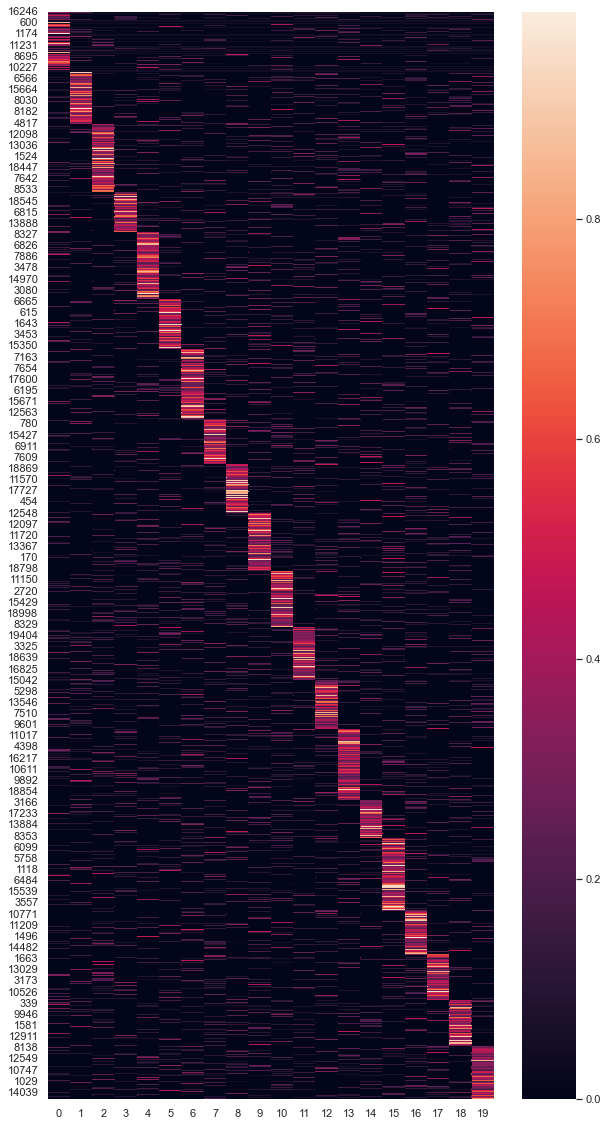

In [51]:
%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index])

<AxesSubplot:>

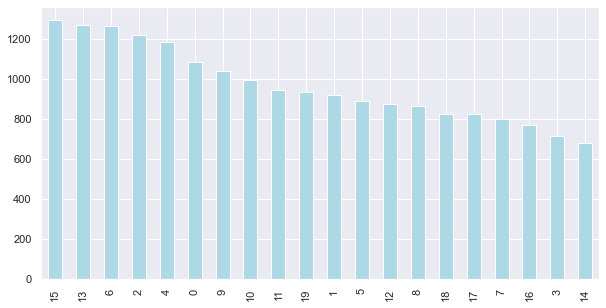

In [52]:
sns.set(rc={'figure.figsize':(10,5)})
document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

In [53]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)